# Tutorial 04 - Edges
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schedldave/cv2021/blob/main/04_Edges.ipynb)
## Dr. David C. Schedl

Note: this tutorial is geared towards students **experienced in programming** and aims to introduce you to **Computer Vision** techniques.


Useful links:
* OpenCV Tutorials: https://docs.opencv.org/master/d9/df8/tutorial_root.html
* Image Processing in Pyhton: https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb



# Contents

This notebook covers topics such as Filters, Fourier Transformation and Interpolation

Table of Contents  
- [Filters in OpenCV](#Filters)
    - Average Filter
    - Gaussian Filter
    - Border Handling
- [Fourier Transformation](#Fourier_Spectrum)
    - FFT of Images
    - Inverse FFT
    - Convolution Theorem

# Initilization

As always let's import useful libraries, first.

In [2]:
import os
import cv2 # openCV
import numpy as np
import matplotlib.pyplot as plt

We will work with images today. So let's download some with `curl` (the same sources as in `02_OpenCV.ipynb`).

In [3]:
!curl -o "cat.jpg" "https://placekitten.com/256/256"
!curl -o "gogh.jpg" "https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Vincent_van_Gogh_-_National_Gallery_of_Art.JPG/367px-Vincent_van_Gogh_-_National_Gallery_of_Art.JPG"
!curl -o "einstein.jpg" "https://www.cns.nyu.edu/~lcv/ssim/index_files/image003.jpg"
# !curl -o "woman.jpg" "https://live.staticflickr.com/8859/18045025168_3a1ffa6521_w_d.jpg"
!curl -o "woman.jpg" "https://live.staticflickr.com/8859/18045025168_3a1ffa6521_c_d.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9472    0  9472    0     0  43449      0 --:--:-- --:--:-- --:--:-- 43649
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84904  100 84904    0     0   383k      0 --:--:-- --:--:-- --:--:--  383k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16025  100 16025    0     0  64357      0 --:--:-- --:--:-- --:--:-- 64100
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 56921    0 56921    0     0   181k      0 --:--:-- --:--:-- --:--:--  181k


Let's define utility functions to display images, in Jupyter Notebooks. OpenCV's `imshow` does not work and matplotlib's `imshow` needs special treatment due to color channel handling (RGB vs. BGR)

In [4]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab.patches import cv2_imshow
else:
  print('Not running on CoLab')
  def cv2_imshow(img):
      """A replacement for cv2.imshow() for use in Jupyter notebooks.

        Args:
          img : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
      """
      cv2.imshow('image', img)
      cv2.waitKey(0)
      cv2.destroyAllWindows()

def imshow(image, *args, **kwargs):
    """A replacement for cv2.imshow() for use in Jupyter notebooks using matplotlib.

        Args:
          image : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. 
    """
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion  
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    # plt.show()

Running on CoLab


# Practice with linear filters

Image filters in OpenCV are applied with `cv2.filter2D(img,-1,kernel)`, where the image and the kernel are numpy arrays.
You can define a custom kernel by defining a numpy array:  
```
np.array([[0,0,0],
          [0,1,0],
          [0,0,0]])
```


## Try it yourself: What results do you expect?

What results do you expect if you apply the following kernels:
1. \begin{pmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0 \end{pmatrix}

1. \begin{pmatrix}
0 & 0 & 0\\
0 & 0 & 1\\
0 & 0 & 0 \end{pmatrix}

1. \begin{pmatrix}
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1 \end{pmatrix}

1. Furthermore, what do you expect if you filter an image with:
  \begin{pmatrix}
      0 & 0 & 0\\
      0 & 2 & 0\\
      0 & 0 & 0 \end{pmatrix}
  and subtract another filtered image from the result. The second image is filtered with:    
  * \begin{pmatrix}
      \frac{1}{9}  & \frac{1}{9}  & \frac{1}{9} \\
      \frac{1}{9}  & \frac{1}{9}  & \frac{1}{9} \\
      \frac{1}{9}  & \frac{1}{9}  & \frac{1}{9} \end{pmatrix} 

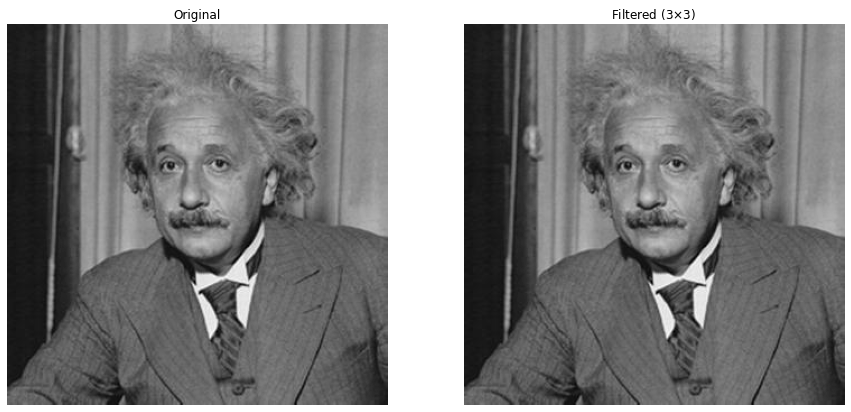

In [11]:
img = cv2.imread('einstein.jpg')[:,:,1].astype(np.float32)

# define your costum kernel below
kernel = np.array([[0,0,0],
                   [0,1,0],
                   [0,0,0]])
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(15,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),imshow((dst), cmap='gray'),plt.title(r'Filtered ({}$\times${})'.format(*kernel.shape[:2]))
plt.show()

# Canny Edge Detection

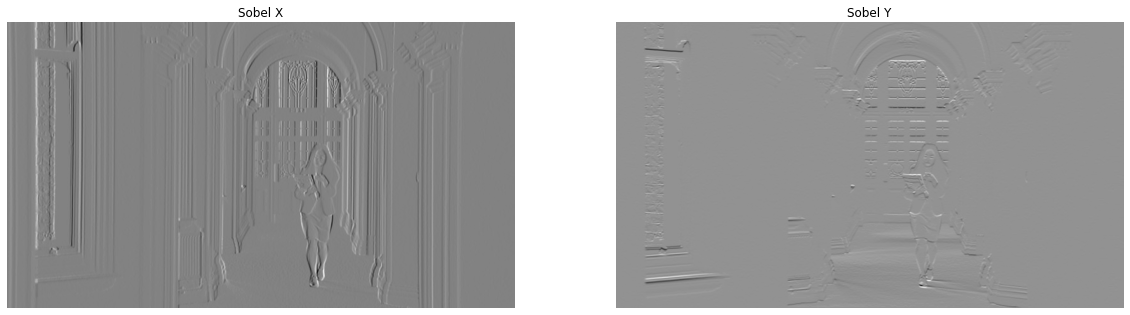

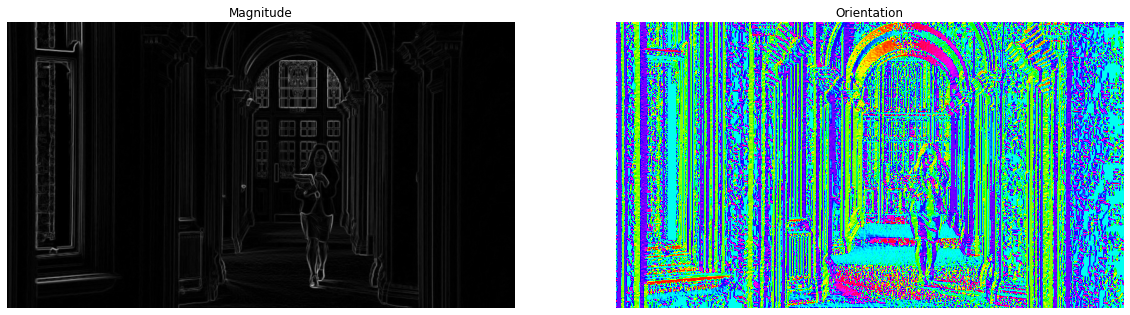

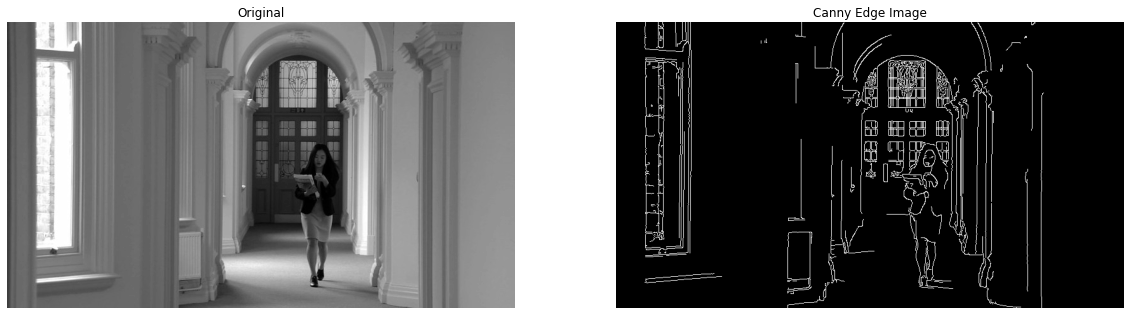

In [6]:
img = cv2.imread('woman.jpg',0)

gsize = (15,15)
#img = cv2.GaussianBlur(img, gsize, 3)

ksize = 3
#edges = cv2.Canny(img,100,200,apertureSize=ksize)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=ksize)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=ksize)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),imshow(sobelx,cmap = 'gray'), plt.title('Sobel X')
plt.subplot(1,2,2),imshow(sobely,cmap = 'gray'), plt.title('Sobel Y')
plt.show()

mag = np.sqrt( sobelx**2 + sobely**2 )
theta = np.arctan2(sobelx, sobely)

plt.figure(figsize=(20,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(mag,cmap = 'gray'), plt.title('Magnitude')
plt.subplot(122), imshow(theta,cmap='hsv'), plt.title('Orientation')
plt.show()

# OpenCVs implementation using the gradients in x and y
edges = cv2.Canny(sobelx.astype(np.int16), sobely.astype(np.int16), 0.1*np.amax(mag),0.2*np.amax(mag))

plt.figure(figsize=(20,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(img,cmap = 'gray'), plt.title('Original')
plt.subplot(122), imshow(edges,cmap = 'gray'), plt.title('Canny Edge Image')
plt.show()

# Hough Transformation

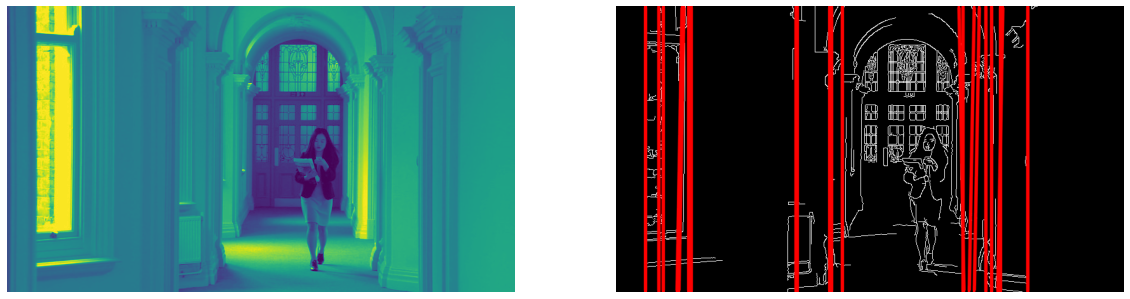

In [7]:
import sys
import math
import cv2 as cv
import numpy as np

default_file = 'sudoku.png'
filename = default_file
# Loads an image
src = cv.imread("woman.jpg", cv.IMREAD_GRAYSCALE)
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')


dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, np.pi )

if lines is not None:
    for i in range(0, len(lines)):
        d = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * d
        y0 = b * d
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# optionally, we can use the probabilistic hough transform:
#linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 150, None, 40, 20)

plt.figure(figsize=(20,10))
plt.subplot(121), imshow(src)
plt.subplot(122),imshow(cdst) #"Detected Lines (in red) - Standard Hough Line Transform", 
plt.show()


d=0.50, theta=-45


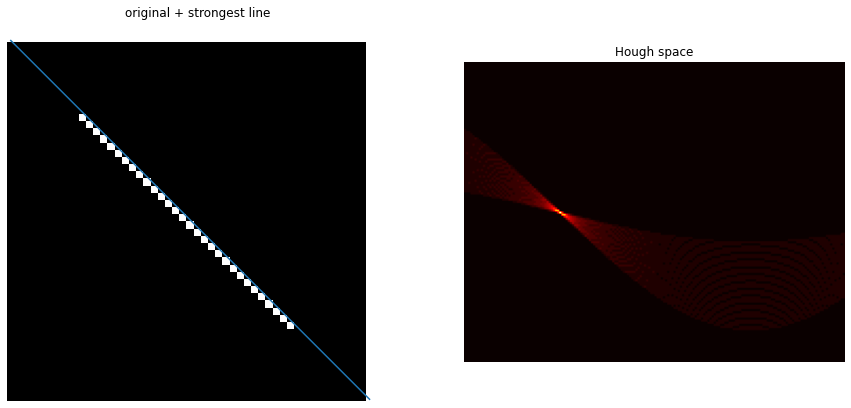

In [8]:
import numpy as np
# example from: https://github.com/alyssaq/hough_transform

def hough_line(img):
  # ds and Theta ranges
  thetas = np.deg2rad(np.arange(-90.0, 90.0))
  width, height = img.shape
  diag_len = int(np.ceil(np.sqrt(width * width + height * height)))  # max_dist
  ds = np.linspace(-diag_len, diag_len, diag_len*2)

  # Cache some resuable values
  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = len(thetas)

  # Hough accumulator array of theta vs rho
  accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
  y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

  # Vote in the hough accumulator
  for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]

    for t_idx in range(num_thetas):
      # Calculate rho. diag_len is added for a positive index
      d = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
      accumulator[d, t_idx] += 1

  return accumulator, thetas, ds

# Create binary image and call hough_line
image = np.zeros((50,50),dtype=np.int8)
#image[:, :] = np.eye(50)[::-1, :]# + np.eye(50)#[::-1, :]
image[10:40,10:40] = np.eye(30)
#image[25,10:40] = 1.0
accumulator, thetas, ds = hough_line(image)

# Easiest peak finding based on max votes
idx = np.argmax(accumulator)
d = ds[np.int(idx / accumulator.shape[1])]
theta = thetas[idx % accumulator.shape[1]]
print("d={:.2f}, theta={:.0f}".format(d, np.rad2deg(theta)))

# convert to m,b formulation for easy plotting
m = -np.cos(theta) / np.sin(theta)
b = d / np.sin(theta)

plt.figure(figsize=(15,10))
plt.subplot(121), imshow(image, cmap='gray')
plt.plot([0,image.shape[1]],[b,(image.shape[1])*m+b]), plt.title( 'original + strongest line' )
plt.subplot(122),imshow(accumulator, cmap='hot'), plt.title( 'Hough space' ) 
plt.show()

# Harris Corner Detector


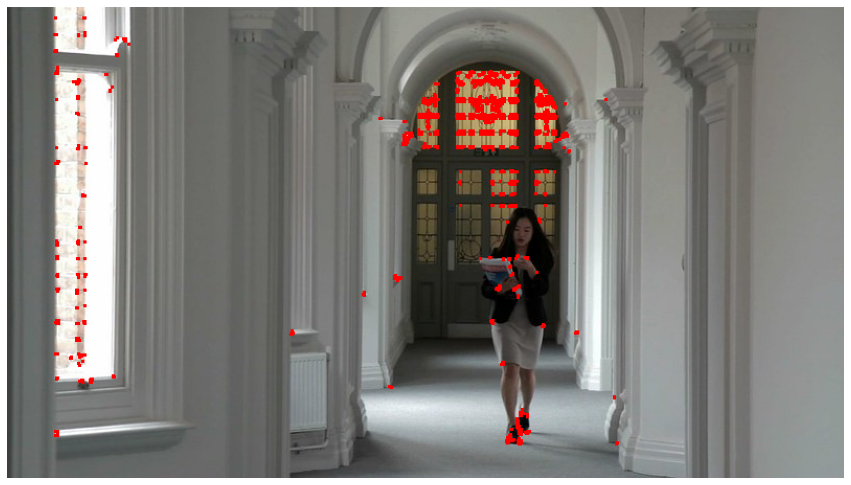

In [9]:
import cv2
import numpy as np

filename = "woman.jpg"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]


plt.figure(figsize=(15,10))
imshow(img)
plt.show()


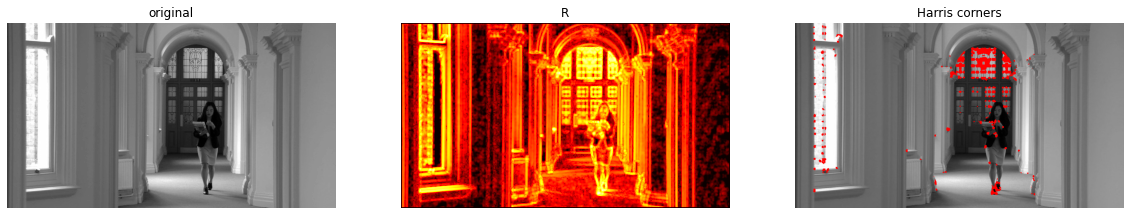

In [10]:
# based on https://github.com/hughesj919/HarrisCorner/blob/master/Corners.py

def findCorners(img, window_size=5, k=0.04, thresh=10000 ):
    """
    Finds and returns list of corners and new image with corners drawn
    :param img: The original image
    :param window_size: The size (side length) of the sliding window
    :param k: Harris corner constant. Usually 0.04 - 0.06
    :param thresh: The threshold above which a corner is counted
    :return:
    """
    #Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]

    cornerList = []
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = int(window_size/2)
    R = np.zeros_like(dx)

    #Loop through image and find our corners
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            #Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            r = det - k*(trace**2)

            R[y,x] = abs(r)

            #If corner response is over threshold, color the point and add to corner list
            if r > thresh:
                #print x, y, r
                cornerList.append([x, y, r])
                color_img.itemset((y, x, 0), 0)
                color_img.itemset((y, x, 1), 0)
                color_img.itemset((y, x, 2), 255)
    return color_img, R, cornerList


filename = "woman.jpg"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

finalImg, R, cornerList = findCorners(gray, 5, 0.05, thresh=10000000)

plt.figure(figsize=(20,15))
plt.subplot(131), imshow(gray, cmap='gray'), plt.title( 'original' )
plt.subplot(132), imshow(np.log(R+1.0), cmap='hot'), plt.title( 'R' )
plt.subplot(133),imshow(finalImg), plt.title( 'Harris corners' ) 
plt.show()


